In [1]:
from utils import general_utils
from matplotlib import pyplot as plt
import cv2
import numpy as np
import scipy.optimize
import pandas as pd

def plot(image,size=(50,7),gray=False):
    plt.figure(figsize = size)
    if gray:
        plt.imshow(image, interpolation='nearest', cmap="gray")
    else:
        plt.imshow(image, interpolation='nearest')
    plt.show()

In [2]:
process_obj = general_utils.process_circles("test_data\\mTeSR 3D\\mTeSR plus-mTeSR3D_D1-1.jpg")

In [3]:
minRadius = 50
maxRadius = 100
minDist = 50

opt = [
    1, 
    50, 
    10, 
    11
]
arguments = [
    minRadius,
    maxRadius,
    minDist
]
opt = scipy.optimize.fmin(process_obj.tune_circle_search, x0=opt, args=tuple(arguments))

[[[148 148 148]
  [150 150 150]
  [152 152 152]
  ...
  [139 139 139]
  [138 138 138]
  [137 137 137]]

 [[143 143 143]
  [144 144 144]
  [145 145 145]
  ...
  [137 137 137]
  [136 136 136]
  [136 136 136]]

 [[144 144 144]
  [144 144 144]
  [143 143 143]
  ...
  [138 138 138]
  [137 137 137]
  [137 137 137]]

 ...

 [[134 134 134]
  [136 136 136]
  [139 139 139]
  ...
  [122 122 122]
  [120   0   0]
  [122 122 122]]

 [[135 135 135]
  [138 138 138]
  [141 141 141]
  ...
  [122 122 122]
  [119   0   0]
  [120   0   0]]

 [[136 136 136]
  [138 138 138]
  [141 141 141]
  ...
  [122 122 122]
  [118   0   0]
  [118   0   0]]]
[[[148 148 148]
  [150 150 150]
  [152 152 152]
  ...
  [139 139 139]
  [138 138 138]
  [137 137 137]]

 [[143 143 143]
  [144 144 144]
  [145 145 145]
  ...
  [137 137 137]
  [136 136 136]
  [136 136 136]]

 [[144 144 144]
  [144 144 144]
  [143 143 143]
  ...
  [138 138 138]
  [137 137 137]
  [137 137 137]]

 ...

 [[134 134 134]
  [136 136 136]
  [139 139 139]
  ..

In [ ]:
opt = [int(opt[i]) if i != 0 else opt[i] for i in range(len(opt))]
opt

[1.0, 52, 10, 11]

Pixels identified: 712467
Dark pixels: 425026


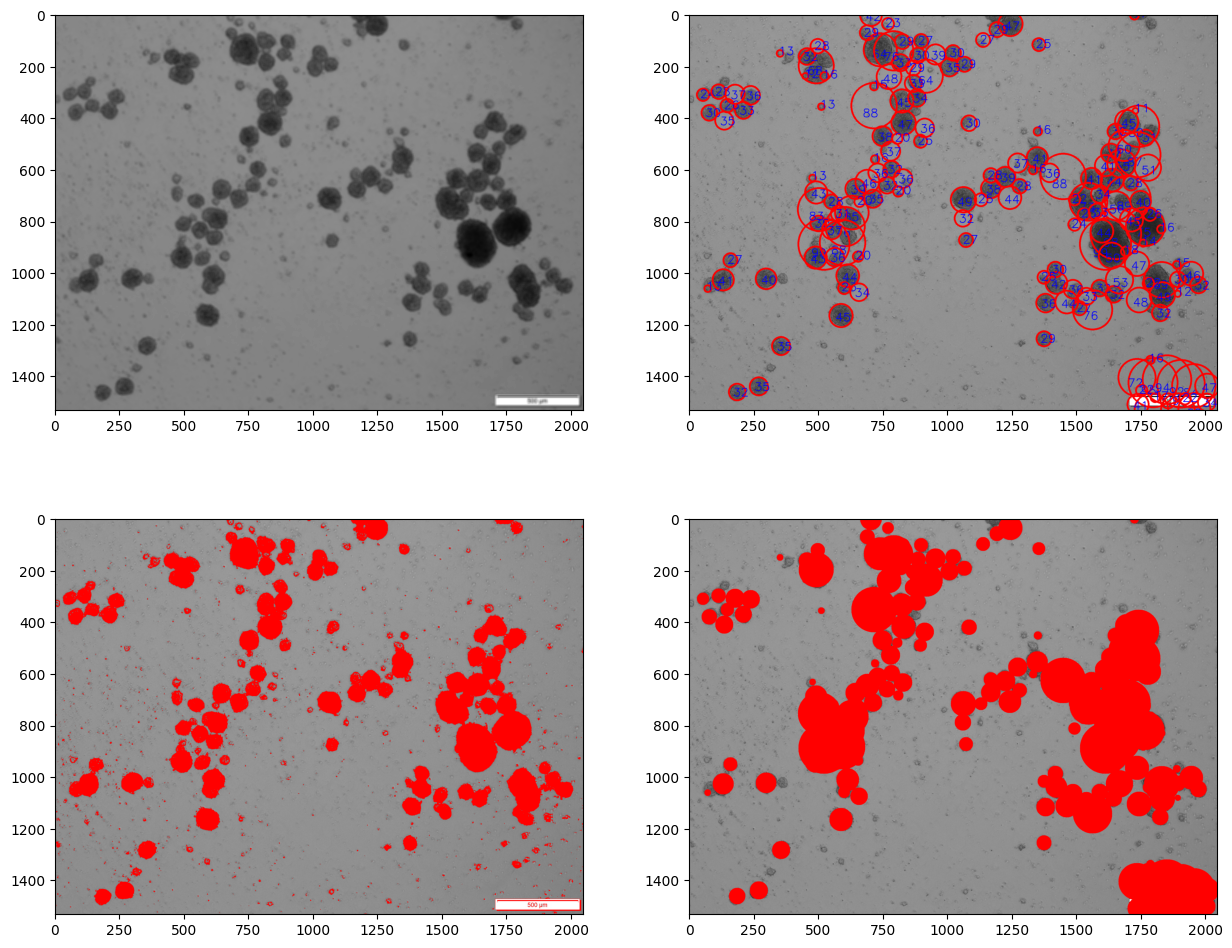

In [ ]:
process_obj.find_circles(
    method=cv2.HOUGH_GRADIENT, 
    dp=opt[0], 
    param1=opt[1], 
    param2=opt[2], 
    blur=(int(opt[3]),int(opt[3])),
    minRadius=10, 
    maxRadius=100,
    minDist=50,
    blur_type="standard"
)
centrioles_identified = process_obj.plot_circles(
    plot=False,
    thickness=5,
    font_size=1.5
)
identifications_filled = process_obj.plot_circles(
    plot=False,
    fill=True,
    radius_overlay=False,
    save=False
)
identified_pixel_count = process_obj.count_colour_pixels(identifications_filled)

dark_pixels_coloured = process_obj.colour_dark_by_threshhold()
dark_pixel_count = process_obj.count_colour_pixels(dark_pixels_coloured)

f, axarr = plt.subplots(2,2,figsize=(15,12))
axarr[0,0].imshow(process_obj.image_gray_blur,cmap="gray")
axarr[0,1].imshow(centrioles_identified)
axarr[1,0].imshow(dark_pixels_coloured)
axarr[1,1].imshow(identifications_filled)

identified_pixel_count = np.count_nonzero(np.all(identifications_filled == (255, 0, 0), axis=2))
dark_pixel_count = np.count_nonzero(np.all(dark_pixels_coloured == (255, 0, 0), axis=2))
print(f"Pixels identified: {identified_pixel_count}")
print(f"Dark pixels: {dark_pixel_count}")

Pixels identified: 135533
Dark pixels: 425026


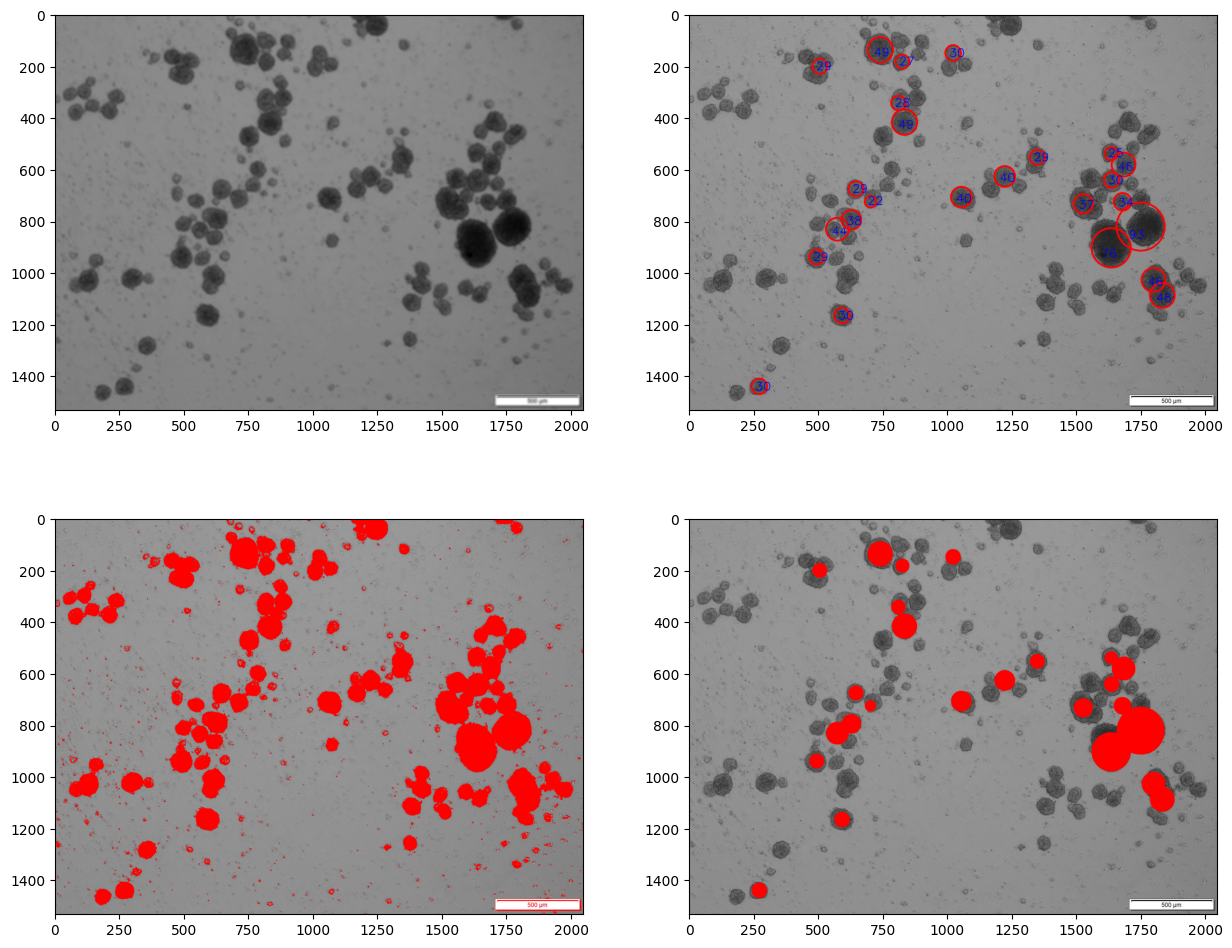

In [ ]:
process_obj.find_circles(
    method=cv2.HOUGH_GRADIENT, 
    dp=1, 
    minDist=50,
    param1=10, 
    param2=50, 
    minRadius=10, 
    maxRadius=100,
    blur=(11,11),
    blur_type="standard"
)
centrioles_identified = process_obj.plot_circles(
    plot=False,
    thickness=5,
    font_size=1.5
)
identifications_filled = process_obj.plot_circles(
    plot=False,
    fill=True,
    radius_overlay=False,
    save=False
)
identified_pixel_count = process_obj.count_colour_pixels(identifications_filled)

dark_pixels_coloured = process_obj.colour_dark_by_threshhold()
dark_pixel_count = process_obj.count_colour_pixels(dark_pixels_coloured)

f, axarr = plt.subplots(2,2,figsize=(15,12))
axarr[0,0].imshow(process_obj.image_gray_blur,cmap="gray")
axarr[0,1].imshow(centrioles_identified)
axarr[1,0].imshow(dark_pixels_coloured)
axarr[1,1].imshow(identifications_filled)

identified_pixel_count = np.count_nonzero(np.all(identifications_filled == (255, 0, 0), axis=2))
dark_pixel_count = np.count_nonzero(np.all(dark_pixels_coloured == (255, 0, 0), axis=2))
print(f"Pixels identified: {identified_pixel_count}")
print(f"Dark pixels: {dark_pixel_count}")

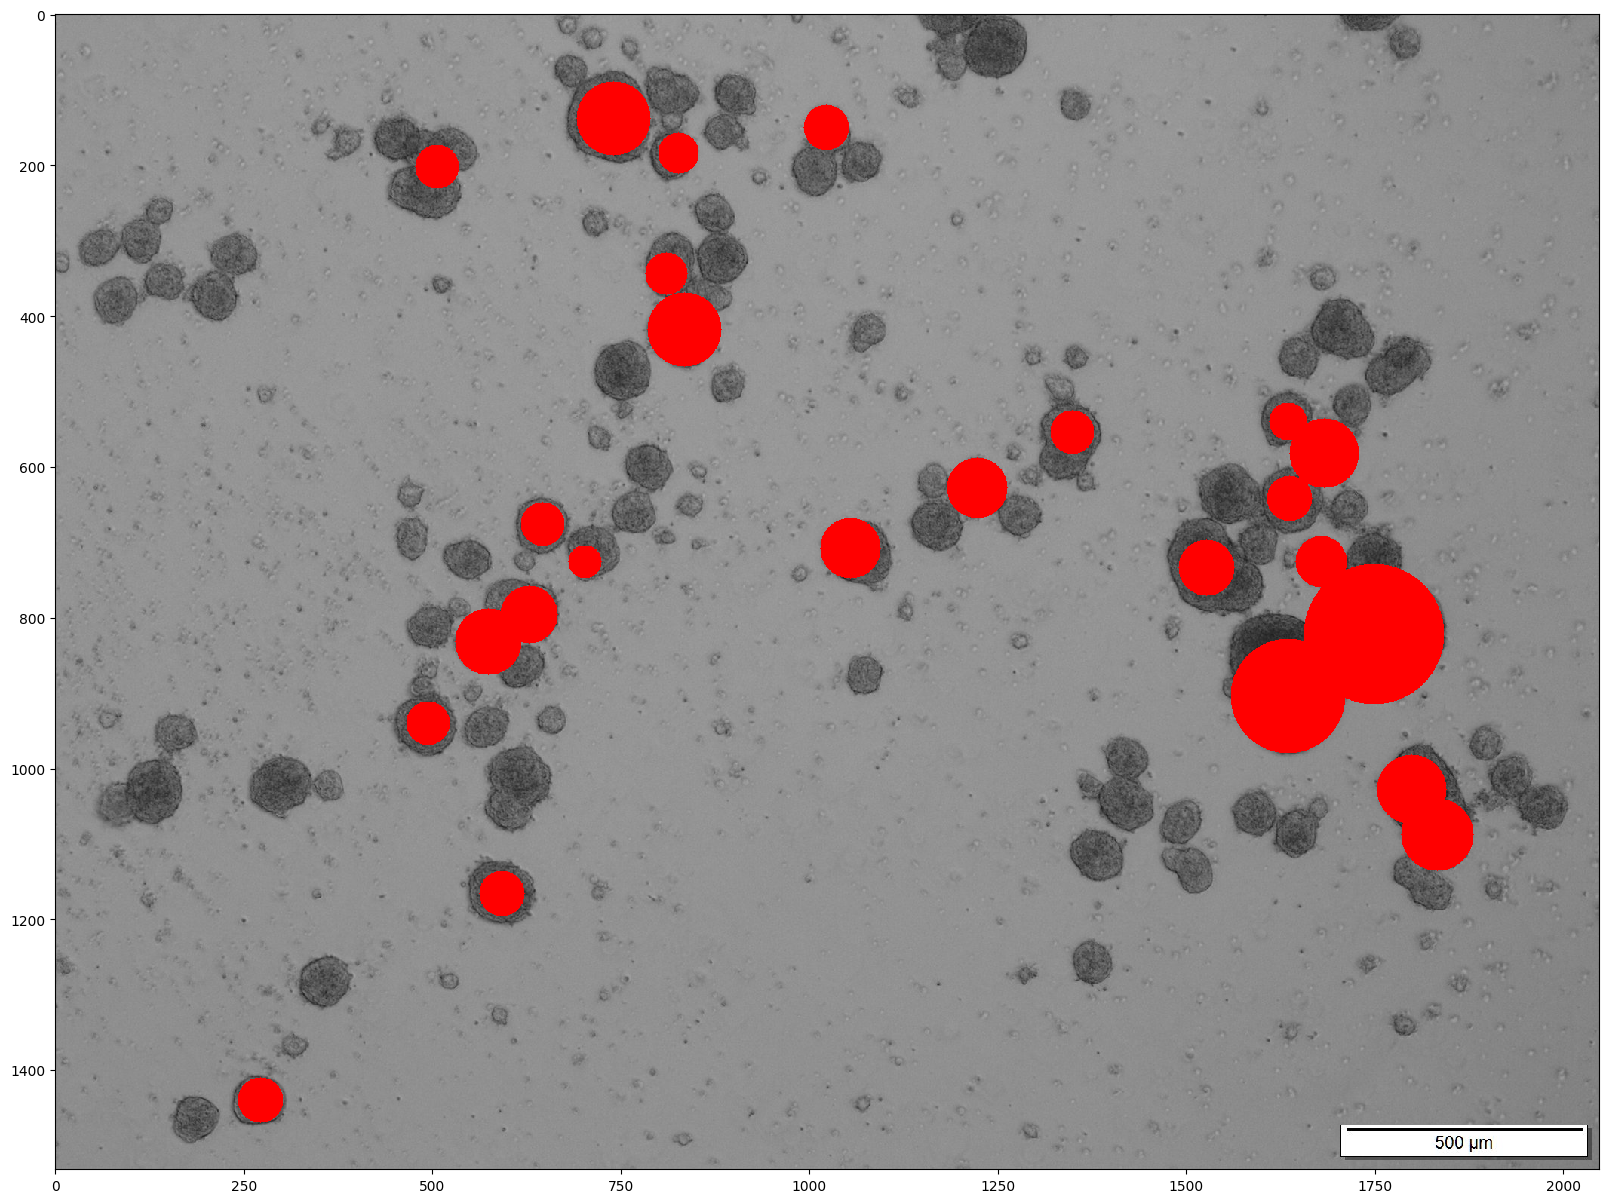

In [ ]:

plt.figure(figsize = (50,15))
plt.imshow(identifications_filled, interpolation='nearest')
plt.show()

In [ ]:
identified_pixel_count = process_obj.count_colour_pixels(identifications_filled)